In [1]:
# Load the TensorBoard notebook extension.

%reload_ext tensorboard
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras import initializers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.optimizer_v2.adam import Adam
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from tensorflow.keras import backend as K
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import pathlib
import pickle
import pathlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from datetime import datetime
import seaborn as sns
import tensorboard
tensorboard.__version__

2021-11-16 10:57:04.922170: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/melodic/lib
2021-11-16 10:57:04.922202: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.4.0'

# Load Data and Create Dataframes for Different Scenarios

In [2]:
BaseData = pd.read_csv('/content/drive/Shareddrives/Microclimate-Building Energy/Data/microclimate
Jupyter Notebook
Sensitivity_Analysis (unsaved changes) Current Kernel Logo 

Python 3 (ipykernel)

    File
    Edit
    View
    Insert
    Cell
    Kernel
    Help

# Load the TensorBoard notebook extension.

​

%reload_ext tensorboard

from tensorflow.python.keras.models import Sequential

from tensorflow.python.keras.layers import Dense

from tensorflow.keras import initializers

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras.optimizers import SGD

from tensorflow.python.keras.optimizer_v2.adam import Adam

from tensorflow.keras.layers import Dropout

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import metrics

from tensorflow.keras import backend as K

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

import pandas as pd

import numpy as np

import pathlib

import pickle

import pathlib

import matplotlib.pyplot as plt

from matplotlib.pyplot import cm

from datetime import datetime

import seaborn as sns

import tensorboard

tensorboard.__version__

2021-11-16 10:57:04.922170: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/melodic/lib
2021-11-16 10:57:04.922202: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

'2.4.0'

Load Data and Create Dataframes for Different Scenarios

BaseData = pd.read_csv('/content/drive/Shareddrives/Microclimate-Building Energy/Data/microclimate_model/Combined/summer_limited.csv')

_model/Combined/summer_limited.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Shareddrives/Microclimate-Building Energy/Data/microclimate_model/Combined/summer_limited.csv'

In [3]:
BaseData = BaseData.drop(columns = ['Unnamed: 0'])

NameError: name 'BaseData' is not defined

In [93]:
# Copy Data for AirTemp & AbsHum scenarios before performing operation on AirTemp & AbsHum for BaseData
AirTempMinus1 = BaseData.copy()
AbsHumMinus1 = BaseData.copy()
AllScen = BaseData.copy()

In [94]:
# Perform operation on AirTemp & AbsHum then Copy Data to Shade Scenarios
BaseData['Air Temp Squared'] = BaseData['Air Temp']**2
BaseData['Abs Hum Squared'] = BaseData['Abs Hum']**2
BaseData['Air Temp x Abs Hum'] = BaseData['Air Temp']*BaseData['Abs Hum']
WestShade25 = BaseData.copy()
EastShade25 = BaseData.copy()
NorthShade25 = BaseData.copy()
SouthShade25 = BaseData.copy()
AllShade25 = BaseData.copy()

In [95]:
# Perform operation for shade scenarios 
WestShade25.loc[WestShade25['Shade West'] < 1, 'Shade West'] = WestShade25['Shade West'] + WestShade25['Shade West']*0.25
EastShade25.loc[EastShade25['Shade East'] < 1, 'Shade East'] = EastShade25['Shade East'] + EastShade25['Shade East']*0.25
NorthShade25.loc[NorthShade25['Shade North'] < 1, 'Shade North'] = NorthShade25['Shade North'] + NorthShade25['Shade North']*0.25
SouthShade25.loc[SouthShade25['Shade South'] < 1, 'Shade South'] = SouthShade25['Shade South'] + SouthShade25['Shade South']*0.25

AllShade25.loc[AllShade25['Shade West'] < 1, 'Shade West'] = AllShade25['Shade West'] + AllShade25['Shade West']*0.25
AllShade25.loc[AllShade25['Shade East'] < 1, 'Shade East'] = AllShade25['Shade East'] + AllShade25['Shade East']*0.25
AllShade25.loc[AllShade25['Shade North'] < 1, 'Shade North'] = AllShade25['Shade North'] + AllShade25['Shade North']*0.25
AllShade25.loc[AllShade25['Shade South'] < 1, 'Shade South'] = AllShade25['Shade South'] + AllShade25['Shade South']*0.25

In [96]:
# Perform operation for AirTempMinus1, AbsHumMinus1, and AllScenarios
AirTempMinus1['Air Temp'] = AirTempMinus1['Air Temp'] - 1
AirTempMinus1['Air Temp Squared'] = AirTempMinus1['Air Temp']**2
AirTempMinus1['Abs Hum Squared'] = AirTempMinus1['Abs Hum']**2
AirTempMinus1['Air Temp x Abs Hum'] = AirTempMinus1['Air Temp']*AirTempMinus1['Abs Hum']

AbsHumMinus1['Abs Hum'] = AbsHumMinus1['Abs Hum'] - 1
AbsHumMinus1['Air Temp Squared'] = AbsHumMinus1['Air Temp']**2
AbsHumMinus1['Abs Hum Squared'] = AbsHumMinus1['Abs Hum']**2
AbsHumMinus1['Air Temp x Abs Hum'] = AbsHumMinus1['Air Temp']*AbsHumMinus1['Abs Hum']

AllScen['Air Temp'] = AllScen['Air Temp'] - 1
AllScen['Abs Hum'] = AllScen['Abs Hum'] - 1
AllScen['Air Temp Squared'] = AllScen['Air Temp']**2
AllScen['Abs Hum Squared'] = AllScen['Abs Hum']**2
AllScen['Air Temp x Abs Hum'] = AllScen['Air Temp']*AllScen['Abs Hum']
AllScen.loc[AllScen['Shade West'] < 1, 'Shade West'] = AllScen['Shade West'] + AllScen['Shade West']*0.25
AllScen.loc[AllScen['Shade East'] < 1, 'Shade East'] = AllScen['Shade East'] + AllScen['Shade East']*0.25
AllScen.loc[AllScen['Shade North'] < 1, 'Shade North'] = AllScen['Shade North'] + AllScen['Shade North']*0.25
AllScen.loc[AllScen['Shade South'] < 1, 'Shade South'] = AllScen['Shade South'] + AllScen['Shade South']*0.25

# Train BaseData

In [297]:
X.head()

,Air Temp,Abs Hum,Air Temp Squared,Abs Hum Squared,Air Temp x Abs Hum,DSW Top,DSW North,DSW South,DSW East,DSW West,Shade North,Shade East,Shade West,Shade South,bldgname_Biodesign A,bldgname_Biodesign B,bldgname_Biodesign C,bldgname_Bulldog Hall,bldgname_Goldwater,bldgname_ISTB 2,bldgname_ISTB 4,bldgname_Noble Library,bldgname_Psychology,bldgname_Psychology North,bldgname_Schwada COB
0,-2.254611,-0.547703,-2.028775,-0.471384,-0.962637,-1.352763,-0.585256,-0.717069,-0.689141,-0.636274,0.658410,0.744254,0.709717,0.849436,0,0,0,0,0,0,0,1,0,0,0
1,-2.362713,-0.209431,-2.103895,-0.282013,-0.789151,-1.352763,-0.585256,-0.717069,-0.689141,-0.636274,0.658410,0.744254,0.709717,0.849436,0,0,0,0,0,0,0,1,0,0,0
2,-2.401938,-0.274836,-2.130731,-0.321266,-0.836823,-1.352763,-0.585256,-0.717069,-0.689141,-0.636274,0.658410,0.744254,0.709717,0.849436,0,0,0,0,0,0,0,1,0,0,0
3,-2.417766,-0.286656,-2.141496,-0.328225,-0.847513,-1.352763,-0.585256,-0.717069,-0.689141,-0.636274,0.658410,0.744254,0.709717,0.849436,0,0,0,0,0,0,0,1,0,0,0
4,-2.440176,-0.296480,-2.156674,-0.333978,-0.858622,-1.319985,-0.268943,-0.717069,-0.663380,-0.636274,0.212344,0.689581,0.709717,0.849436,0,0,0,0,0,0,0,1,0,0,0


In [294]:
###### Train/Validate and Test on Each Day ######
data = []
unique_m = BaseData['Month'].unique()
for i,C in enumerate(unique_m):
  unique_d = BaseData[BaseData['Month'] == C]['Day'].unique()
  for x,V in enumerate(unique_d):
    # Copy original data, save current day to df_test, remove current day from df
    df = BaseData.copy()
    df_test = df[(df['Month']==C) & (df['Day']==V)]
    df.drop(df[(df['Month']==C) & (df['Day']==V)].index, inplace = True)
    # Define X for train/validate and X_test_day for testing
    X = df[['bldgname','Air Temp','Abs Hum','Air Temp Squared','Abs Hum Squared','Air Temp x Abs Hum',
                  'DSW Top','DSW North','DSW South','DSW East','DSW West','Shade North','Shade East',
                  'Shade West','Shade South']]
    X_test_day = df_test[['bldgname','Air Temp','Abs Hum','Air Temp Squared','Abs Hum Squared','Air Temp x Abs Hum',
                  'DSW Top','DSW North','DSW South','DSW East','DSW West','Shade North','Shade East',
                  'Shade West','Shade South']]
    columns = ['Air Temp', 'Abs Hum', 'Air Temp Squared','Abs Hum Squared', 'Air Temp x Abs Hum', 'DSW Top',
              'DSW North', 'DSW South', 'DSW East','DSW West','Shade North', 'Shade East', 'Shade West', 'Shade South']
    X = pd.get_dummies(X)
    X_test_day = pd.get_dummies(X_test_day)
    if (C < 6) or (V == 8) or (C < 7 & V < 20):
      X_test_day['bldgname_Biodesign C'] = 0
      col = X_test_day.pop('bldgname_Biodesign C')
      X_test_day.insert(16, 'bldgname_Biodesign C', col)
    xscaler = StandardScaler()
    X[columns] = xscaler.fit_transform(X[columns])
    X_test_day[columns] = xscaler.transform(X_test_day[columns])
    Y = df['CHWTON/SQFT']
    Y_test_day = df_test['CHWTON/SQFT']
    Y_test_day = Y_test_day.values.reshape(-1, 1)
    Y = Y.values.reshape(-1, 1)
    yscaler = StandardScaler()
    Y = yscaler.fit_transform(Y)
    Y_test_day = yscaler.transform(Y_test_day)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=20)
    model = Sequential()
    model.add(Dense(100, input_dim = 25, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(1, activation = 'linear'))
    model.compile( loss = 'mse', optimizer = 'adam', metrics=[tf.keras.metrics.MeanSquaredError()])
    epochs = 50
    batch_size = 128
    validation_split = 0.1
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=0)
    y_preds = model.predict(X_test)
    y_day_preds = model.predict(X_test_day)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_preds))
    R2_score = metrics.r2_score(y_test, y_preds)
    RMSE_day = np.sqrt(metrics.mean_squared_error(Y_test_day, y_day_preds))
    R2_score_day = metrics.r2_score(Y_test_day, y_day_preds) 
    data.append([str(C) + '/' + str(V), R2_score, R2_score_day])  
    print(C, V, R2_score, R2_score_day)
column_names = ["Day Removed", "Validation R2", "Test Day R2"]
results = pd.DataFrame(data, columns = column_names)

5 16 0.9859696284879359 0.9749451081805307
5 23 0.9871080271329848 0.9736337279739533
5 28 0.9870700675688299 0.9652184668246311
6 7 0.9866490971115152 0.9842006531667485
6 8 0.986672568515456 0.9827923712614619
6 20 0.987445664525362 0.9325344526197782
6 21 0.987147736398392 0.9722385630688211
6 25 0.9882903947680551 0.9337563773172348
6 26 0.9881644513702589 0.9730257549076239
6 27 0.9861225753846888 0.9683435065324059
7 1 0.9854107224795843 0.9349523435848395
8 1 0.9840509176029042 0.9401694781121501
8 3 0.9835512194220798 0.945008046447537


In [295]:
results

,Day Removed,Validation R2,Test Day R2
0,5/16,0.985970,0.974945
1,5/23,0.987108,0.973634
2,5/28,0.987070,0.965218
3,6/7,0.986649,0.984201
4,6/8,0.986673,0.982792
5,6/20,0.987446,0.932534
6,6/21,0.987148,0.972239
7,6/25,0.988290,0.933756
8,6/26,0.988164,0.973026
9,6/27,0.986123,0.968344


In [256]:
X = BaseData[['bldgname','Air Temp','Abs Hum','Air Temp Squared','Abs Hum Squared','Air Temp x Abs Hum',
              'DSW Top','DSW North','DSW South','DSW East','DSW West','Shade North','Shade East',
              'Shade West','Shade South']]
columns = ['Air Temp', 'Abs Hum', 'Air Temp Squared','Abs Hum Squared', 'Air Temp x Abs Hum', 'DSW Top',
           'DSW North', 'DSW South', 'DSW East','DSW West','Shade North', 'Shade East', 'Shade West', 'Shade South']
X = pd.get_dummies(X)
xscaler = StandardScaler()
X[columns] = xscaler.fit_transform(X[columns])
Y = BaseData['CHWTON/SQFT']
Y = Y.values.reshape(-1, 1)
yscaler = StandardScaler()
Y = yscaler.fit_transform(Y)

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [258]:
model = Sequential()
model.add(Dense(100, input_dim = 25, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1, activation = 'linear'))
model.compile( loss = 'mse', optimizer = 'adam', metrics=[tf.keras.metrics.MeanSquaredError()])
model.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_260 (Dense)            (None, 100)               2600      
_________________________________________________________________
dense_261 (Dense)            (None, 200)               20200     
_________________________________________________________________
module_wrapper_148 (ModuleWr (None, 200)               0         
_________________________________________________________________
dense_262 (Dense)            (None, 100)               20100     
_________________________________________________________________
module_wrapper_149 (ModuleWr (None, 100)               0         
_________________________________________________________________
dense_263 (Dense)            (None, 100)               10100     
_________________________________________________________________
module_wrapper_150 (ModuleWr (None, 100)             

In [ ]:
epochs = 200
batch_size = 128
validation_split = 0.2
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

In [260]:
y_preds = model.predict(X_test)

In [261]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_preds))
R2_score = metrics.r2_score(y_test, y_preds)

In [262]:
R2_score

0.9879549456686044

In [264]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

[5, 6, 7, 8]
Please select month from options above: 7
[1]
Please select day from options above:  1


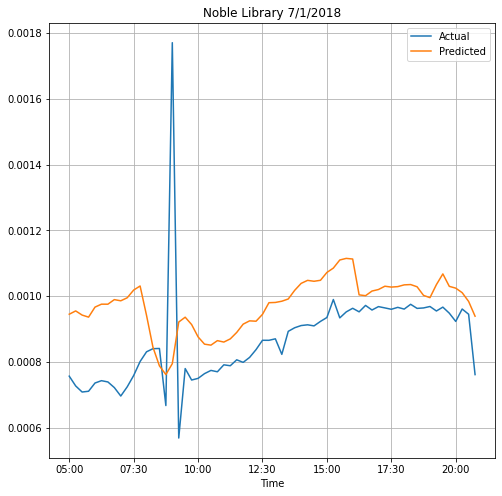

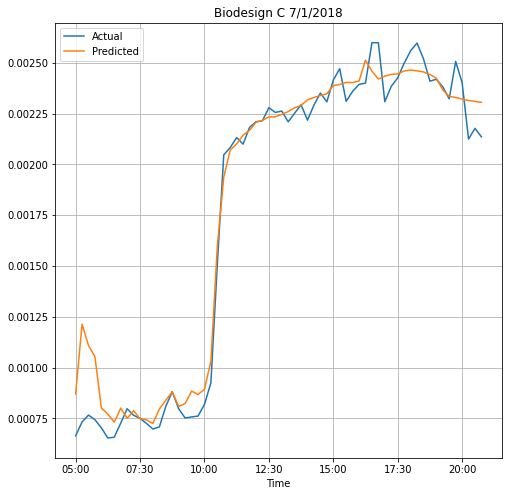

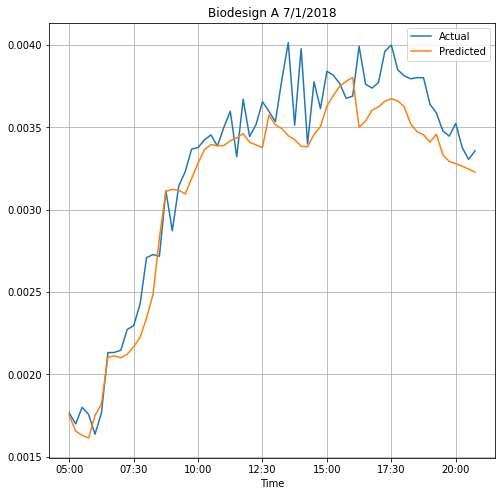

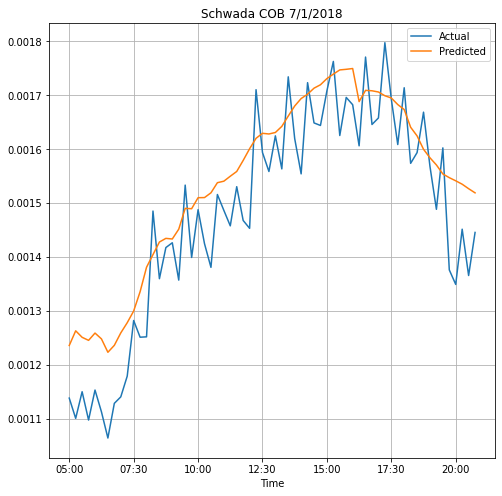

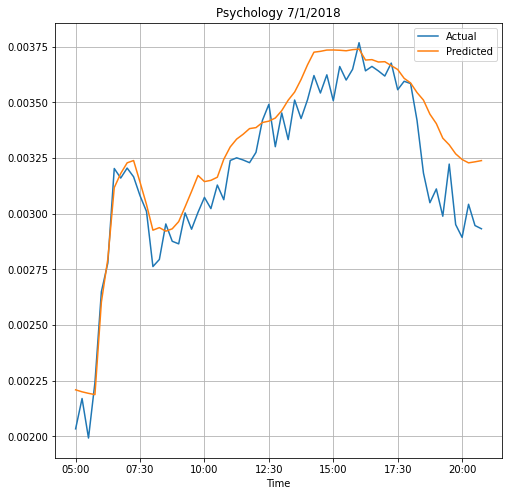

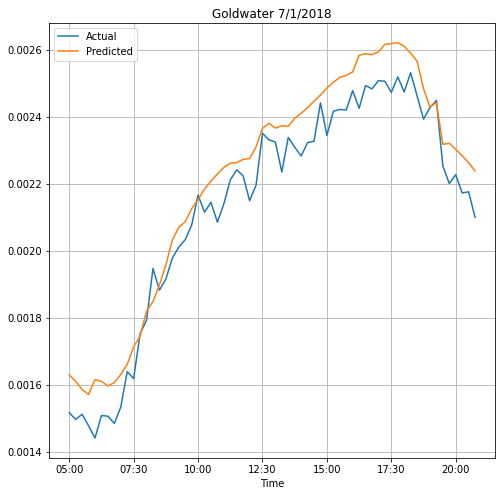

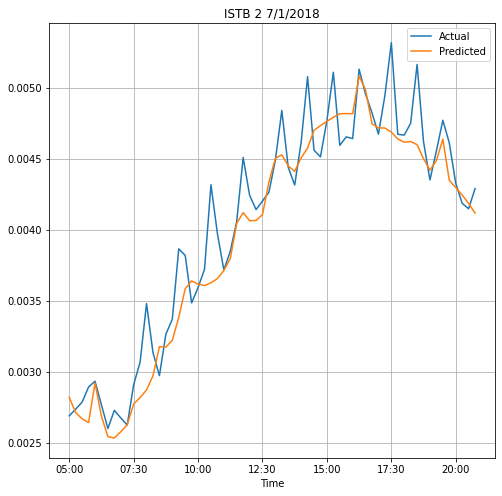

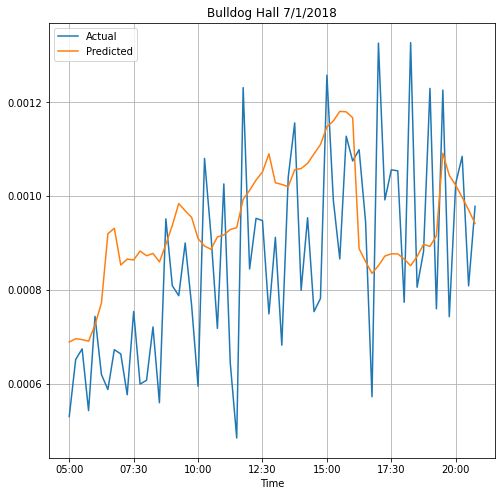

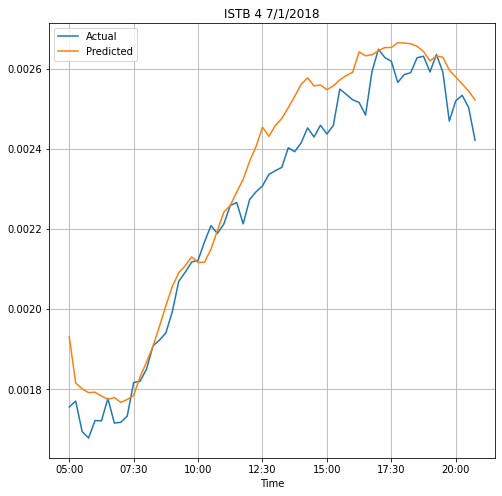

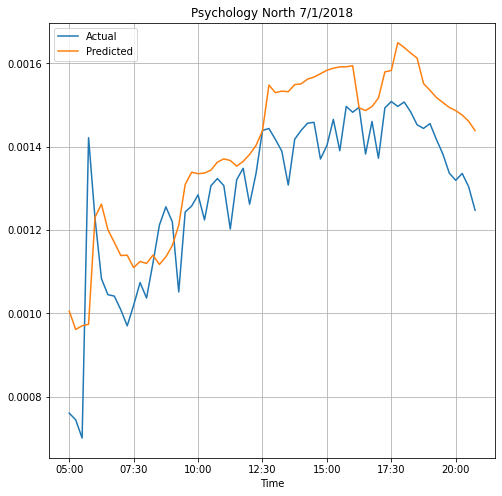

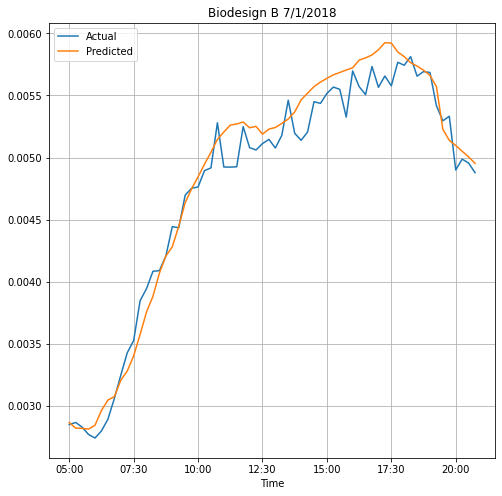

In [283]:
# Ask User to Enter Specific Day
print(list(BaseData['Month'].unique()))
m = int(input('Please select month from options above: '))
print(BaseData[BaseData['Month'] == m]['Day'].unique())
d = int(input('Please select day from options above:  '))

date_time = BaseData[['Date_Time','Month','Day','Hour','Minute']]
Y_preds_original = model.predict(X)
results = undummify(X).join(date_time)
Y_actual = yscaler.inverse_transform(Y)
results['Actual'] = Y_actual

Buildings = results['bldgname'].unique()
for bldg in Buildings:       
  results['Time'] = results['Date_Time'].str[11:16]
  results['Predicted'] = yscaler.inverse_transform(Y_preds_original)        
  month_NN = results.loc[results['Month'] == m]
  day_NN = month_NN.loc[month_NN['Day'] == d]
  bldg_NN = day_NN.loc[results['bldgname']==bldg]
  values_NN = bldg_NN.sort_values(by=['Time'])          
  ax = values_NN.plot(x='Time',y='Actual', figsize = (8,8))
  values_NN.plot(x='Time',y='Predicted',figsize = (8,8),ax=ax)
  ax.set_title(bldg + ' ' + str(m) + '/' + str(d) + '/2018' )
  ax.grid(True)

In [279]:
11

'Biodesign B'

In [270]:
1results

,Air Temp,Abs Hum,Air Temp Squared,Abs Hum Squared,Air Temp x Abs Hum,DSW Top,DSW North,DSW South,DSW East,DSW West,Shade North,Shade East,Shade West,Shade South,bldgname,Date_Time,Month,Day,Hour,Minute,Actual,Time,Predicted
0,-2.307224,-0.639148,-2.070356,-0.567903,-1.004219,-1.345483,-0.570848,-0.721947,-0.684908,-0.635588,0.643108,0.740622,0.707725,0.862327,Noble Library,2018-05-16 05:00:00,5,16,5,0,0.000695,05:00,0.000860
1,-2.414769,-0.341677,-2.144540,-0.399804,-0.852787,-1.345483,-0.570848,-0.721947,-0.684908,-0.635588,0.643108,0.740622,0.707725,0.862327,Noble Library,2018-05-16 05:15:00,5,16,5,15,0.000740,05:15,0.000887
2,-2.453792,-0.399193,-2.171041,-0.434648,-0.894398,-1.345483,-0.570848,-0.721947,-0.684908,-0.635588,0.643108,0.740622,0.707725,0.862327,Noble Library,2018-05-16 05:30:00,5,16,5,30,0.000720,05:30,0.000875
3,-2.469539,-0.409588,-2.181672,-0.440825,-0.903730,-1.345483,-0.570848,-0.721947,-0.684908,-0.635588,0.643108,0.740622,0.707725,0.862327,Noble Library,2018-05-16 05:45:00,5,16,5,45,0.000741,05:45,0.000870
4,-2.491833,-0.418227,-2.196661,-0.445931,-0.913426,-1.312636,-0.245635,-0.721947,-0.658988,-0.635588,0.191824,0.685833,0.707725,0.862327,Noble Library,2018-05-16 06:00:00,5,16,6,0,0.000694,06:00,0.000861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,1.067306,1.275873,1.113600,1.039844,1.552339,-1.345483,-0.570848,-0.721947,-0.684908,-0.635588,0.643108,0.740622,0.707725,0.862327,Biodesign B,2018-08-03 19:45:00,8,3,19,45,0.006649,19:45,0.006442
8465,1.044062,1.295248,1.085992,1.062469,1.561941,-1.345483,-0.570848,-0.721947,-0.684908,-0.635588,0.643108,0.740622,0.707725,0.862327,Biodesign B,2018-08-03 20:00:00,8,3,20,0,0.006662,20:00,0.006434
8466,1.014299,1.312434,1.050757,1.082645,1.566456,-1.345483,-0.570848,-0.721947,-0.684908,-0.635588,0.643108,0.740622,0.707725,0.862327,Biodesign B,2018-08-03 20:15:00,8,3,20,15,0.006469,20:15,0.006425
8467,0.992865,1.337459,1.025462,1.112202,1.582233,-1.345483,-0.570848,-0.721947,-0.684908,-0.635588,0.643108,0.740622,0.707725,0.862327,Biodesign B,2018-08-03 20:30:00,8,3,20,30,0.006594,20:30,0.006414


In [163]:
# Ask User to Enter Specific Day
print(list(BaseData['Month'].unique()))
m = int(input('Please select month from options above: '))
print(BaseData[BaseData['Month'] == m]['Day'].unique())
d = int(input('Please select day from options above:  '))

[5, 6, 7, 8]
Please select month from options above: 8
[1 3]


KeyboardInterrupt: ignored